In [1]:
# https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.5-classifying-movie-reviews.ipynb
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 40s 2us/step


In [148]:
for i in train_data[0]:
    for key,value in imdb.get_word_index().items():
        if(value==(i-3)):
            print(key,end=" ")
        

this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert is an amazing actor and now the same being director father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also to the two little boy's that played the of norman and paul they were just brilliant children are often left out of the list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole s

In [9]:
for text in train_data[:5] :
    print(len(text), text[:10])

218 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
189 [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463]
141 [1, 14, 47, 8, 30, 31, 7, 4, 249, 108]
550 [1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111]
147 [1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637]


In [14]:
# learning
maxvalue = [max(seq[:10]) for seq in train_data]
# it will find the max unique vocab size
maxvalue[0]

1622

In [19]:
max([max(seq) for seq in train_data]) #max vocab id is 9999

9999

In [18]:
min([min(seq) for seq in train_data]) # min vocab id is 1 (range is 1-9999)

1

In [20]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 3s 2us/step


In [33]:
word_index['fawn']

34701

In [39]:
reverse_word_index[4]

'of'

In [40]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [41]:
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [75]:
# learning about dict. 
sample = [1000000, 22]  #100000 is not available in dict
for i in sample :
    print(reverse_word_index.get(i-3, '?'))

?
film


In [64]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
#     print(np.argmax(results))
    for i, sequence in enumerate(sequences):
#         print(i, sequence)
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
#     print(np.argmax(results))
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [68]:
# learning numpy - index based value update
test = np.zeros(10)
print(test)
cc = np.array([2,9])
test[cc] = 5
print(test)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 5. 0. 0. 0. 0. 0. 0. 5.]


(25000, 10000)

In [142]:
train_labels.shape

1

In [80]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [144]:
x_train.shape

(25000, 10000)

In [143]:
y_train.shape

(25000,)

In [118]:
from keras import models
from keras import layers


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [119]:
# learning - keras parameters tuning section
from keras import optimizers
from keras import losses
from keras import metrics

# model.compile(optimizer='rmsprop',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# instead of passing as strings, you can use object to tune parameters
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


In [120]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [121]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.5089 - binary_accuracy: 0.7905 - val_loss: 0.3847 - val_binary_accuracy: 0.8675
Epoch 2/20
15000/15000 [==============================] - 1s 83us/step - loss: 0.3023 - binary_accuracy: 0.9031 - val_loss: 0.3030 - val_binary_accuracy: 0.8871
Epoch 3/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.2223 - binary_accuracy: 0.9282 - val_loss: 0.2879 - val_binary_accuracy: 0.8861
Epoch 4/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.1733 - binary_accuracy: 0.9453 - val_loss: 0.2738 - val_binary_accuracy: 0.8901
Epoch 5/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.1401 - binary_accuracy: 0.9542 - val_loss: 0.2825 - val_binary_accuracy: 0.8875
Epoch 6/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.1154 - binary_accuracy: 0.9643 - val_loss: 0.3022 - val_binary_

In [122]:
history_dict = history.history
history_dict.keys()


dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

In [123]:
len(history_dict['val_loss'])

20

range(1, 21)


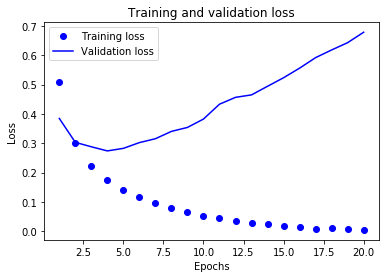

In [124]:
import matplotlib.pyplot as plt

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
print(epochs)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

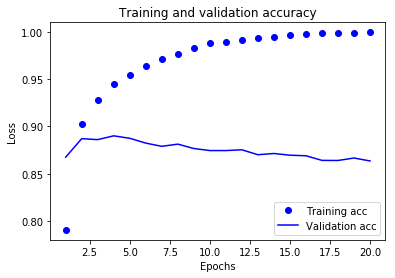

In [125]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [126]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 80us/step - loss: 0.4455 - acc: 0.8207
Epoch 2/4
25000/25000 [==============================] - 1s 60us/step - loss: 0.2544 - acc: 0.9108
Epoch 3/4
25000/25000 [==============================] - 1s 58us/step - loss: 0.1968 - acc: 0.9300
Epoch 4/4
25000/25000 [==============================] - 1s 52us/step


In [127]:
results

[0.30954951328277586, 0.87824]

In [138]:
index = 4
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in test_data[index]])
print(decoded_review)
model.predict(np.expand_dims(x_test[index],0))[0][0]


? like some other people wrote i'm a die hard mario fan and i loved this game br br this game starts slightly boring but trust me it's worth it as soon as you start your hooked the levels are fun and ? they will hook you ? your mind turns to ? i'm not kidding this game is also ? and is beautifully done br br to keep this spoiler free i have to keep my mouth shut about details but please try this game it'll be worth it br br story 9 9 action 10 1 it's that good ? 10 attention ? 10 average 10


0.93546456